In [1]:
#Simple lonear regression

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#  Step 1 ---> Read the dataset

In [5]:
df=pd.read_csv('h_w.csv')

# Step 2 EDA,Feature Engineering

Text(0, 0.5, 'Height')

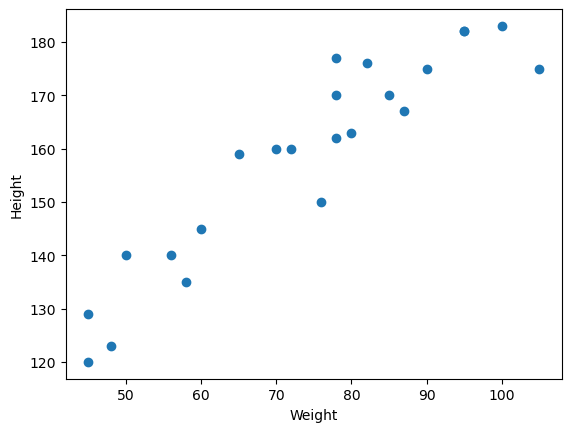

In [9]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [11]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [12]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

# Step 3 : Divide our dataset into dependent and independent feature

In [14]:
X=df[['Weight']]## Independent  Taken as column so two brackets
# Model needs 2-D array

In [19]:
y=df['Height']

In [20]:
X.shape

(23, 1)

Step-4 Divide dataset into train and test

In [17]:
# Use sklearn library .It gives four variables x_test,y_test,x_train,y_train

In [18]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [23]:
X_train.shape

(18, 1)

In [24]:
X_test.shape

(5, 1)

# Step = For SLR We use Standard scaling

In [25]:
# Standard scaling on the train and test data

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()

In [28]:
X_train= scaler.fit_transform(X_train)
# For test data we need to only tranform no fit_transform

In [30]:
X_test=scaler.transform(X_test)

In [32]:
# Do not apply scaling on output featue

Text(0, 0.5, 'Height')

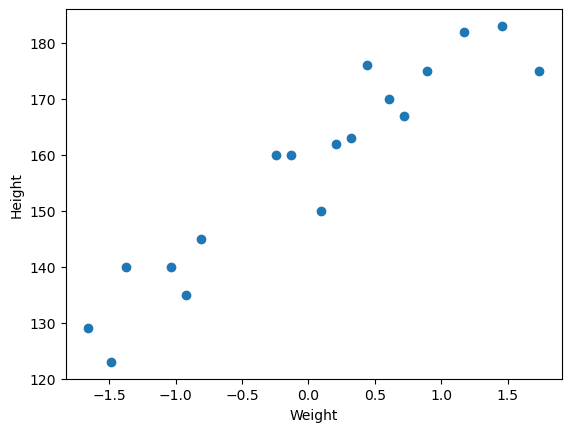

In [33]:
plt.scatter(X_train,y_train)
plt.xlabel('Weight')
plt.ylabel('Height')

In [34]:
# If new datapoint is used then you should do scaling 

In [35]:
scaler.transform([[80]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [36]:
## Model Training 
from sklearn.linear_model import LinearRegression

In [37]:
regressor=LinearRegression()

In [38]:
# Training the Train Data

In [39]:
regressor.fit(X_train,y_train)

LinearRegression()

In [40]:
regressor.intercept_

157.5

In [42]:
regressor.coef_

array([17.03440872])

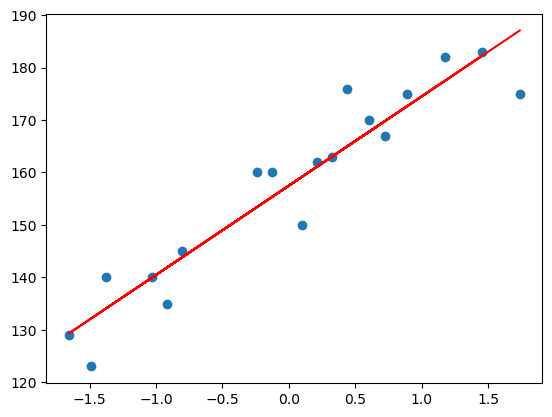

In [45]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

In [46]:
## Prediction for the test data

In [48]:
y_pred_test=regressor.predict(X_test)

In [49]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [50]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

# performance metrics

In [54]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [55]:
mse=mean_squared_error(y_test,y_pred_test)

In [56]:
mae=mean_absolute_error(y_test,y_pred_test)

In [57]:
rmse=np.sqrt(mse)

In [58]:
mse

109.77592599051664

In [59]:
mae

9.822657814519232

In [60]:
rmse

10.477400726827081

In [61]:
## Accuracy of the model

In [62]:
from sklearn.metrics import r2_score

In [63]:
score =r2_score(y_test,y_pred_test)

In [64]:
score

0.776986986042344

In [65]:
# display a_r_squared

In [67]:
a_score=1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [68]:
a_score

0.7026493147231252

In [69]:
scaler

StandardScaler()

In [70]:
regressor

LinearRegression()

# Convert this models into file to run and deploy

In [71]:
# We see further